## Sophia Whitaker
### Data Information:
#### - Observed monthly mean precipitation data over the India region from 1901-2019 in units of mm/day
#### - NetCDF format found on the COLA servers¶

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point  
import cartopy.mpl.ticker as cticker
import matplotlib.colors as colors

In [2]:
file='/homes/swhitak9/clim680data/monthly_precip_India_total.nc'

In [3]:
ds=xr.open_dataset(file, decode_times=False)

ds

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 1428)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.425e+03 1.426e+03 1.427e+03
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [4]:
ds['time']

<xarray.DataArray 'time' (time: 1428)>
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.425e+03, 1.426e+03, 1.427e+03])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.425e+03 1.426e+03 1.427e+03
Attributes:
    standard_name:  time
    long_name:      Time
    units:          months since 1901-01-01 00:00
    calendar:       standard
    axis:           T

In [5]:
ds['time']=pd.date_range(start='01-01-1901',end='12-31-2019',freq='M')
ds['time']

<xarray.DataArray 'time' (time: 1428)>
array(['1901-01-31T00:00:00.000000000', '1901-02-28T00:00:00.000000000',
       '1901-03-31T00:00:00.000000000', ..., '2019-10-31T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1901-01-31 1901-02-28 ... 2019-12-31

In [12]:
ds_mean=ds.mean(dim=['lat','lon'])
ds_mean

<xarray.Dataset>
Dimensions:  (time: 1428)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-31 1901-02-28 ... 2019-12-31
Data variables:
    pr       (time) float32 1.134 1.304 0.5058 1.246 ... 3.438 0.9815 0.5689

#### Plot of mean precipitation over India

Text(0.5, 1.0, 'Precipitation over India 1901-2019')

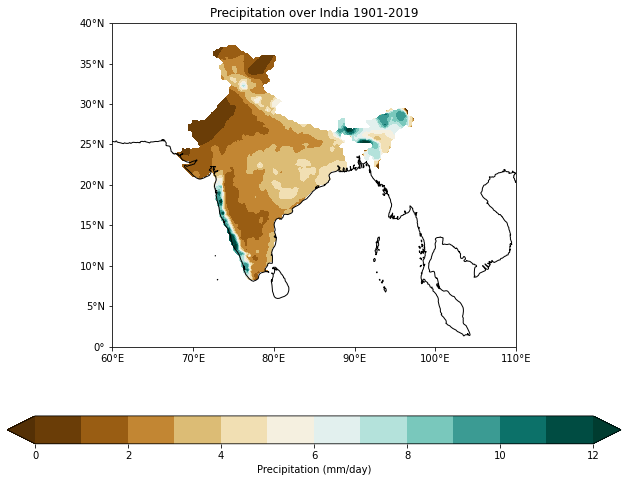

In [7]:
clevs=np.arange(0,13,1)
ds_mean=ds.mean(dim='time')

fig=plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

data=ds_mean['pr']
data,lon=add_cyclic_point(data,coord=ds_mean['lon'])

cs=ax.contourf(lon,ds_mean['lat'],data,clevs,transform=ccrs.PlateCarree(),cmap='BrBG', extend='both')
                          
                          

ax.coastlines()

ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
                          
                          
                          
                
cbar=plt.colorbar(cs,orientation='horizontal',label='Precipitation (mm/day)')                          

                          
                          
                          
plt.title('Precipitation over India 1901-2019')



In [8]:
ds_climo2=ds.groupby('time.month').mean()
ds_anoms2=ds.groupby('time.month')-ds_climo2

ds_anoms2

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 1428)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1901-01-31 1901-02-28 ... 2019-12-31
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Plot of precipitation anomalies over India

<ipython-input-9-183985464088>:5: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  divnorm=colors.DivergingNorm(vcenter=0)      #centers to 0


Text(0.5, 1.0, 'Precipitation Anomalies over India 1901-2019')

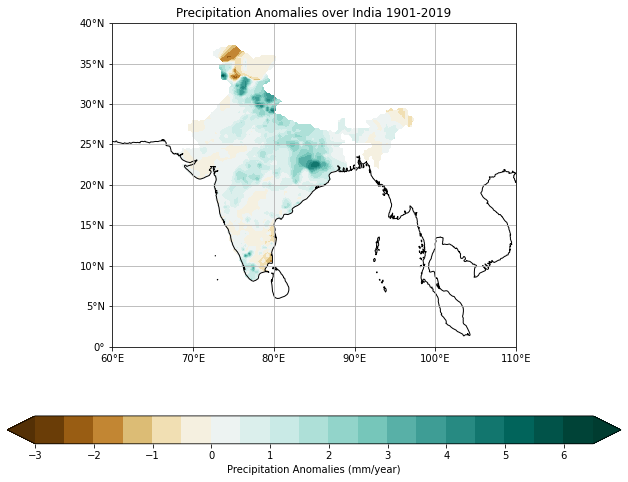

In [9]:
clevs=np.arange(-3,7,0.5)
fig=plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.PlateCarree())

divnorm=colors.DivergingNorm(vcenter=0)      #centers to 0

cs=ax.contourf(ds_anoms2['lon'],ds_anoms2['lat'],ds_anoms2['pr'][0,:,:],clevs,
              transform=ccrs.PlateCarree(),
              cmap='BrBG',extend='both',
              norm=divnorm)

ax.coastlines()
ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
                          

ax.gridlines()
cbar=plt.colorbar(cs,orientation='horizontal',
                 label='Precipitation Anomalies (mm/year)')
plt.title('Precipitation Anomalies over India 1901-2019')

#### 12-panel plot of monthly precipitation climatology over India 

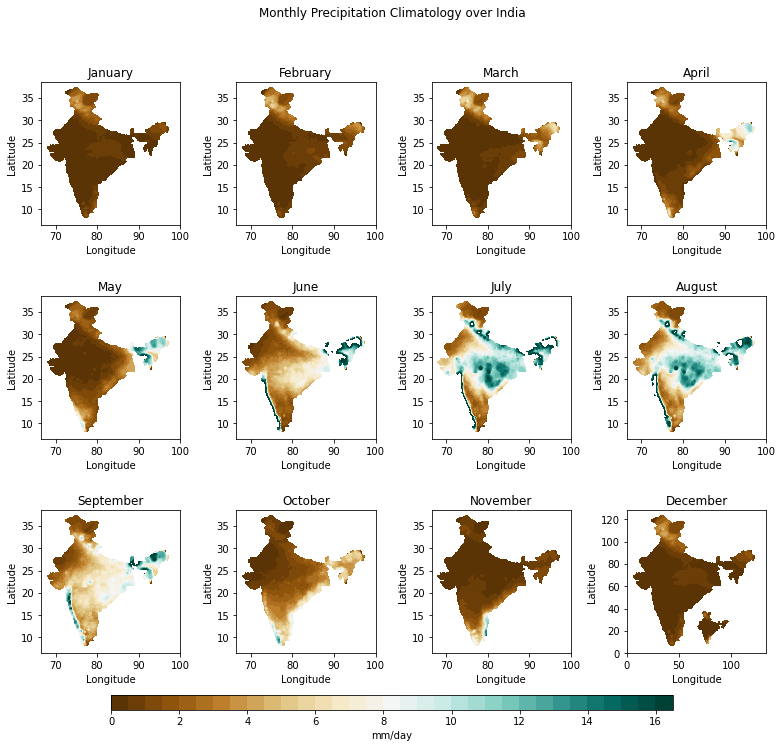

In [10]:
fig = plt.figure(figsize=(13,10.5))
clevs=np.arange(0,17.0,0.5)

plt.subplot(3,4,1)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=1),clevs,cmap='BrBG')
plt.title('January')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,2)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=2),clevs,cmap='BrBG')
plt.title('February')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,3)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=3),clevs,cmap='BrBG')
plt.title('March')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,4)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=4),clevs,cmap='BrBG')
plt.title('April')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,5)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=5),clevs,cmap='BrBG')
plt.title('May')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,6)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=6),clevs,cmap='BrBG')
plt.title('June')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,7)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=7),clevs,cmap='BrBG')
plt.title('July')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,8)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=8),clevs,cmap='BrBG')
plt.title('August')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,9)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=9),clevs,cmap='BrBG')
plt.title('September')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,10)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=10),clevs,cmap='BrBG')
plt.title('October')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,11)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=11),clevs,cmap='BrBG')
plt.title('November')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(3,4,12)
plt.contourf(ds_climo2['lon'],ds_climo2['lat'],ds_climo2['pr'].sel(month=12),clevs,cmap='BrBG')
plt.title('December')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.suptitle('Monthly Precipitation Climatology over India')


fig.subplots_adjust(wspace=0.4,hspace=0.5)

cs2=plt.contourf(ds_climo2['pr'][0,:,:], clevs,cmap='BrBG')

cbar_ax=fig.add_axes([0.2,0.05,0.6,0.02])   #add space for colorbar
cbar=fig.colorbar(cs2,cax=cbar_ax,orientation='horizontal',label='mm/day')



### Find maximum and minimum monsoon

Text(0, 0.5, 'Precipitation (mm/day)')

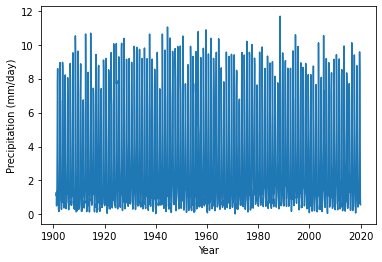

In [13]:
plt.plot(ds['time'],ds_mean['pr'])
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')

#### Maximum Monsoon in 1988

Text(0, 0.5, 'Precipitation (mm/day)')

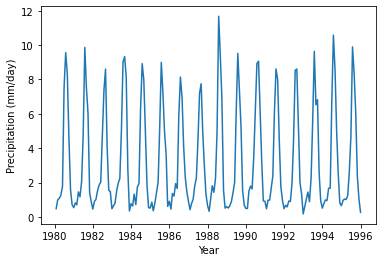

In [14]:
ds_maxmonsoon=ds_mean.sel(time=slice('1980-01-01','1996-01-01'))

plt.plot(ds_maxmonsoon['time'],ds_maxmonsoon['pr'])
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')

#### Minimum Monsoon in 1911

Text(0, 0.5, 'Precipitation (mm/day)')

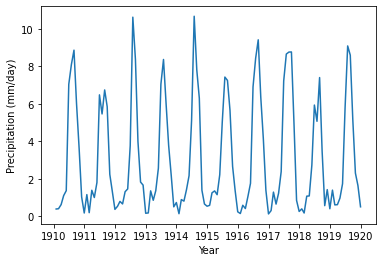

In [15]:
ds_minmonsoon=ds_mean.sel(time=slice('1910-01-01','1920-01-01'))

plt.plot(ds_minmonsoon['time'],ds_minmonsoon['pr'])
plt.xlabel('Year')
plt.ylabel('Precipitation (mm/day)')

In [16]:
ds_month=ds_mean.groupby('time.month').mean()

ds_1988=ds_maxmonsoon.sel(time=slice('1988-01-01','1988-12-31'))

ds_1911=ds_minmonsoon.sel(time=slice('1911-01-01','1911-12-31'))

#### Climatology Compared To Maximum and Minimum Monsoons

Text(0, 0.5, 'Precipitation (mm/day)')

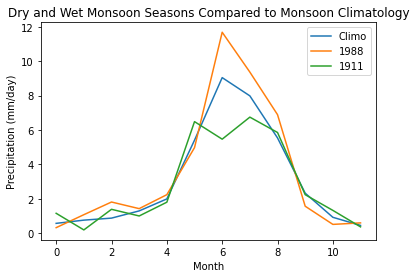

In [17]:
plt.plot(ds_month['pr'])
plt.plot(ds_1988['pr'])
plt.plot(ds_1911['pr'])

plt.legend(['Climo','1988','1911'])
plt.title('Dry and Wet Monsoon Seasons Compared to Monsoon Climatology')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm/day)')

### Pacific Decadal Oscillation Index

#### - Index calculated from monthly SST anomalies in Northern Pacific Ocean.

#### - Found at https://psl.noaa.gov/data/climateindices/list/

In [18]:
path='/shared/ccsm4/kpegion/obs2/CLIM_INDICES/'
file='pdo.data'
index_name='pdo'

df=pd.read_table(path+file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-9.9','-9.90'])
df.drop(df.tail(5).index,inplace=True)

In [19]:
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,-0.11,-0.74,-0.03,-1.33,-0.23,0.08,-0.92,-1.56,-1.74,-1.32,-0.89,-1.70
1949,-2.01,-3.60,-1.00,-0.53,-1.07,-0.70,-0.56,-1.30,-0.93,-1.41,-0.83,-0.80
1950,-2.13,-2.91,-1.13,-1.20,-2.23,-1.77,-2.93,-0.70,-2.14,-1.36,-2.46,-0.76
1951,-1.54,-1.06,-1.90,-0.36,-0.25,-1.09,0.70,-1.37,-0.08,-0.32,-0.28,-1.68
1952,-2.01,-0.46,-0.63,-1.05,-1.00,-1.43,-1.25,-0.60,-0.89,-0.35,-0.76,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0.30,0.38,0.97,1.13,1.80,0.82,0.70,0.67,1.08,1.49,1.72,2.51
2015,2.45,2.30,2.00,1.44,1.20,1.54,1.84,1.56,1.94,1.47,0.86,1.01
2016,1.53,1.75,2.40,2.62,2.35,2.03,1.25,0.52,0.45,0.56,1.88,1.17


#### Fix times and convert from string to floating points

In [20]:
start_date=str(df.index[0])+'-'+str(df.columns[0])+'-01'
end_date=str(df.index[-1])+'-'+str(df.columns[-1])+'-01'

In [21]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=852, freq='MS')

In [22]:
clim_index=df.T.unstack().values

In [23]:
ds_index=xr.DataArray(clim_index,
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='pdo')
ds_index

<xarray.Dataset>
Dimensions:  (time: 852)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
Data variables:
    pdo      (time) object '-0.11' '-0.74' '-0.03' -1.33 ... 0.09 nan nan nan

In [24]:
ds_index['pdo']=ds_index['pdo'].astype(np.float)

ds_index

<xarray.Dataset>
Dimensions:  (time: 852)
Coordinates:
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
Data variables:
    pdo      (time) float64 -0.11 -0.74 -0.03 -1.33 -0.23 ... 0.09 nan nan nan

#### Plot of PDO Index vs Year

Text(0, 0.5, 'PDO Index')

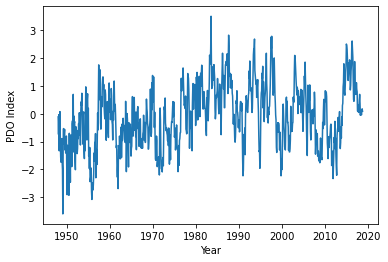

In [25]:
plt.plot(ds_index['time'],ds_index['pdo'])
plt.xlabel('Year')
plt.ylabel('PDO Index')

#### Define Warm, Cool, and Neutral PDO

In [26]:
warm=ds_index['pdo'].where(ds_index['pdo']>=1)

cool=ds_index['pdo'].where(ds_index['pdo']<=-1)

neutral=ds_index['pdo'].where(np.logical_and(ds_index['pdo']<1,ds_index['pdo']>-1))

In [27]:
print('Warm PDO:',warm.count(dim='time').values)

print('Cool PDO:',cool.count(dim='time').values)

print('Neutral PDO:',neutral.count(dim='time').values)

Warm PDO: 146
Cool PDO: 190
Neutral PDO: 513


In [28]:
counts=[warm.count(dim='time').values, cool.count(dim='time').values,neutral.count(dim='time').values]
counts

[array(146), array(190), array(513)]

In [29]:
ds['time']=pd.date_range(start='01-01-1901',end='12-31-2019',freq='MS')
ds

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 1428)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2019-12-01
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

#### Match up times between the two datasets

#### - Now going from 1948-2018

In [30]:
data_pr=ds.sel(time=slice(ds_index['time'][0], ds_index['time'][-1]))

data_pr

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 852)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [31]:
data_pr_climo=data_pr.groupby('time.month').mean()
data_pr_anom=data_pr.groupby('time.month')-data_pr_climo

data_pr_anom

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 852)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Define precipitation during warm, cool, and neutral PDO

In [32]:
warm_precip=data_pr_anom.sel(time=warm.dropna(dim='time')['time']).mean(dim='time')

cool_precip=data_pr_anom.sel(time=cool.dropna(dim='time')['time']).mean(dim='time')

neutral_precip=data_pr_anom.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

### Composites

In [33]:
comp_precip=[warm_precip,cool_precip,neutral_precip]

Text(0.5, 0.98, 'Composite Precipitation Anomalies over India during PDO')

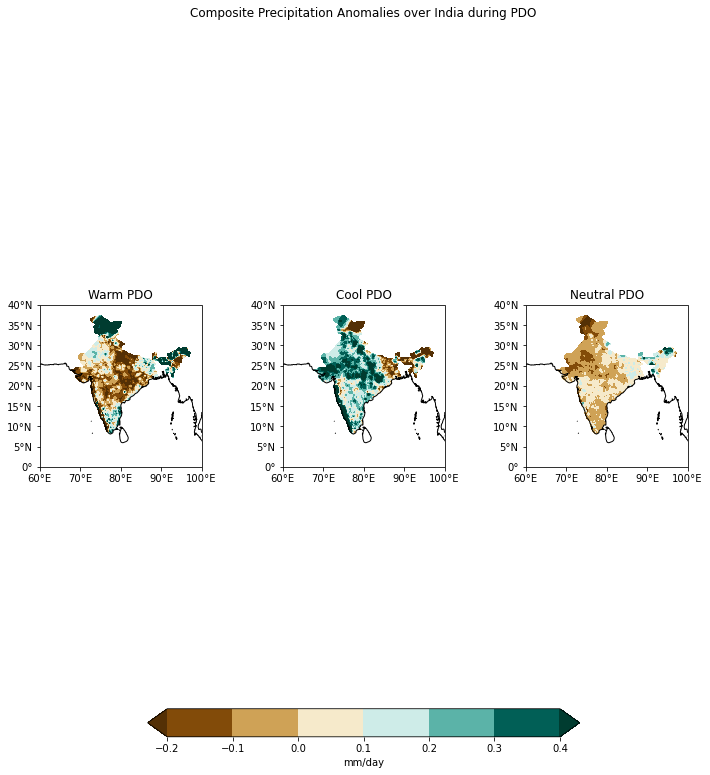

In [34]:
clevs=np.arange(-0.2,0.5,0.1)

labels=['Warm PDO','Cool PDO','Neutral PDO']

fig,axs= plt.subplots(nrows=1,ncols=3,subplot_kw={'projection':ccrs.PlateCarree()},
                     figsize=(10,13))

axs=axs.flatten()

for i,pdo in enumerate(comp_precip):
    
    data=comp_precip[i]['pr']
    
    data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])
    
    cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                       transform=ccrs.PlateCarree(),
                      cmap='BrBG',extend='both')
    
    axs[i].set_xticks(np.arange(60,101,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    
    axs[i].set_yticks(np.arange(0,41,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    
    axs[i].coastlines()
    
    axs[i].set_title(labels[i])
    


    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.5, hspace=0.5)

    
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.03])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')
    
plt.suptitle('Composite Precipitation Anomalies over India during PDO')

In [35]:
diff_precip=[warm_precip-neutral_precip,
            cool_precip-neutral_precip]

<ipython-input-36-3366417ec2be>:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.03])


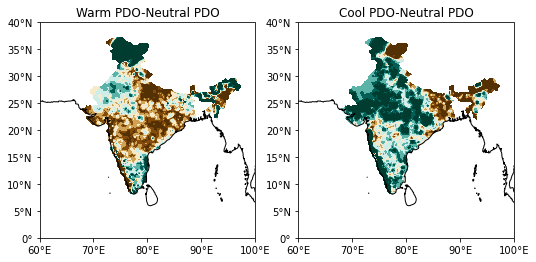

In [36]:
labels=['Warm PDO-Neutral PDO','Cool PDO-Neutral PDO']
clevs=np.arange(-0.2,0.5,0.1)

figs, axs=plt.subplots(nrows=1,ncols=2,
                      subplot_kw={'projection':ccrs.PlateCarree()},
                      figsize=(8.5,11))

axs=axs.flatten()

for i,pdo in enumerate(diff_precip):
    data=diff_precip[i]['pr']
    data,lons=add_cyclic_point(data,coord=diff_precip[i]['lon'])
    cs=axs[i].contourf(lons,diff_precip[i]['lat'],data,clevs,
                      transform=ccrs.PlateCarree(),
                      cmap='BrBG',extend='both')
    
    axs[i].set_xticks(np.arange(60,101,10), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    
    axs[i].set_yticks(np.arange(0,41,5), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    
    axs[i].set_title(labels[i])
    axs[i].coastlines()
    
    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.03])

cbar=fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm/day')
    

### Composite Significance

In [37]:
from scipy.stats import ttest_ind

p=0.05   #null hypothesis

a=data_pr_anom.sel(time=warm.dropna(dim='time')['time'])
b=data_pr_anom.sel(time=neutral.dropna(dim='time')['time'])

tstat, pval=ttest_ind(a['pr'],b['pr'],equal_var=False)

In [38]:
mask_diff=warm_precip['pr'].where(pval<p)

Text(0.5, 1.0, 'Composite Precipitation Differences Warm PDO-Neutral PDO')

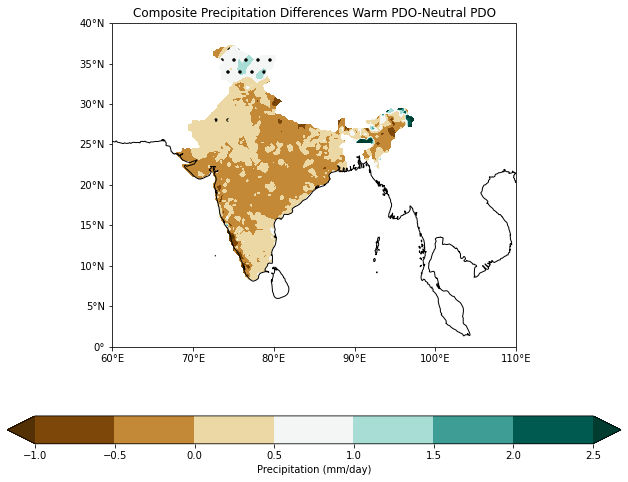

In [39]:
labels=['Warm PDO-Neutral PDO']
clevs=np.arange(-1,3,0.5)
hatch_levs=[0]

fig=plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())


data=diff_precip[0]['pr']


data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])

mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])


cs=ax.contourf(lons,diff_precip[0]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

ax.contourf(lons,diff_precip[0]['lat'],mask_data,
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)


ax.coastlines()

ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


cbar=plt.colorbar(cs,orientation='horizontal',label='Precipitation (mm/day)')                          


plt.title('Composite Precipitation Differences Warm PDO-Neutral PDO')

In [40]:
a2=data_pr_anom.sel(time=cool.dropna(dim='time')['time'])
b2=data_pr_anom.sel(time=neutral.dropna(dim='time')['time'])

tstat, pval=ttest_ind(a['pr'],b['pr'],equal_var=False)

In [41]:
mask_diff2=cool_precip['pr'].where(pval<p)

Text(0.5, 0.98, 'Composite Precipitation Differences Cool PDO-Neutral PDO')

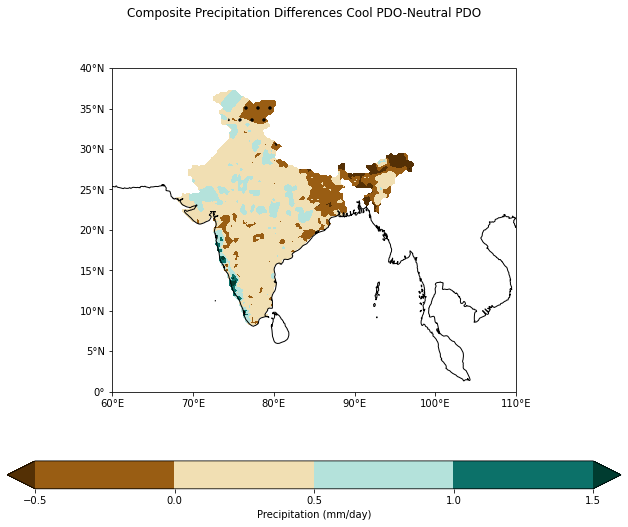

In [42]:
labels=['Cool PDO-Neutral PDO']
clevs=np.arange(-0.5,2,0.5)
hatch_levs=[0]

fig=plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())


data=diff_precip[1]['pr']


data,lons=add_cyclic_point(data,coord=diff_precip[1]['lon'])

mask_data,lons=add_cyclic_point(mask_diff2,coord=diff_precip[1]['lon'])


cs=ax.contourf(lons,diff_precip[1]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

ax.contourf(lons,diff_precip[1]['lat'],mask_data,
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)


ax.coastlines()

ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


cbar=plt.colorbar(cs,orientation='horizontal',label='Precipitation (mm/day)')                          


plt.suptitle('Composite Precipitation Differences Cool PDO-Neutral PDO')

### Correlation between PDO and Precipitation Anomalies over India

In [43]:
rmap=xr.corr(ds_index['pdo'],data_pr_anom['pr'],dim='time')

rmap

<xarray.DataArray (lat: 129, lon: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5

Text(0.5, 1.0, 'Correlation between PDO and Indian Precipitation Anomalies')

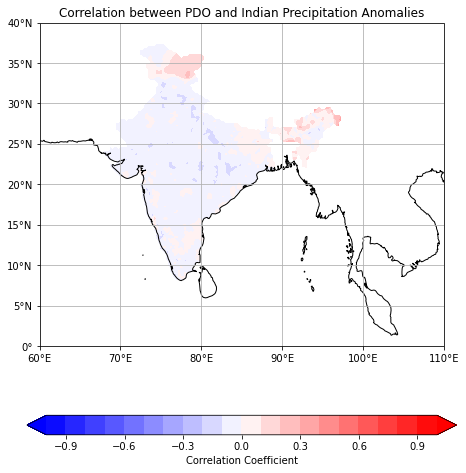

In [44]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

data=rmap
data,lon=add_cyclic_point(rmap,coord=data_pr_anom['lon'])


cs=ax.contourf(lon,data_pr_anom['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')


ax.coastlines()


ax.gridlines()

 
ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)


ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')


plt.title('Correlation between PDO and Indian Precipitation Anomalies')

### Correlation between the Monsoon of 1988 and PDO

In [45]:
ds_1988_2=ds.sel(time=slice('1988-06-01','1988-09-30'))
ds_1988_2

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 4)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1988-06-01 1988-07-01 1988-08-01 1988-09-01
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [46]:
ds_1988_2['time']=pd.date_range(start='06-01-1988',end='09-30-1988',freq='MS')
ds_1988_2

<xarray.Dataset>
Dimensions:  (lat: 129, lon: 135, time: 4)
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * time     (time) datetime64[ns] 1988-06-01 1988-07-01 1988-08-01 1988-09-01
Data variables:
    pr       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Tue Sep 01 11:33:12 2020: cdo mergetime rainfall1_by2nc_mon...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

#### Graph of precipitation over India during the 1988 Monsoon

Text(0.5, 1.0, 'Precipitation during 1988 Indian Monsoon')

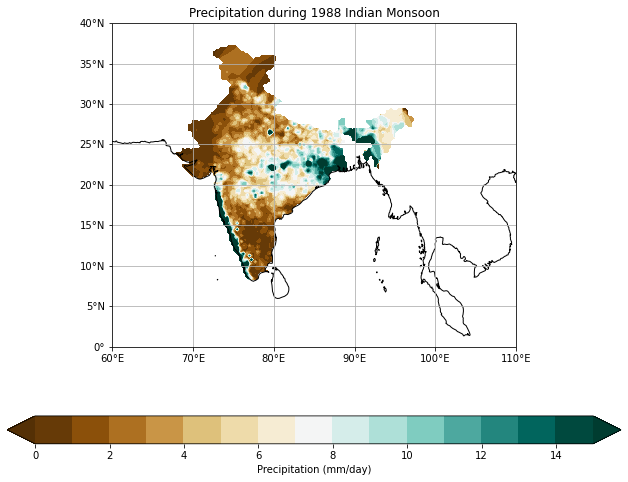

In [47]:
clevs=np.arange(0,16,1)
fig=plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.PlateCarree())

#divnorm=colors.DivergingNorm(vcenter=0)      #centers to 0

cs=ax.contourf(ds_1988_2['lon'],ds_1988_2['lat'],ds_1988_2['pr'][0,:,:],clevs,
              transform=ccrs.PlateCarree(),
              cmap='BrBG',extend='both')

ax.coastlines()
ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
                          

ax.gridlines()
cbar=plt.colorbar(cs,orientation='horizontal',
                 label='Precipitation (mm/day)')
plt.title('Precipitation during 1988 Indian Monsoon')

In [48]:
maxmon_index=ds_index.sel(time=slice(ds_1988_2['time'][0], ds_1988_2['time'][-1]))
maxmon_index

<xarray.Dataset>
Dimensions:  (time: 4)
Coordinates:
  * time     (time) datetime64[ns] 1988-06-01 1988-07-01 1988-08-01 1988-09-01
Data variables:
    pdo      (time) float64 0.74 0.64 0.19 -0.37

In [49]:
maxmon_rmap=xr.corr(maxmon_index['pdo'],ds_1988_2['pr'],dim='time')

maxmon_rmap

<xarray.DataArray (lat: 129, lon: 135)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5

#### Graph of the Correlation between the 1988 Indian Monsoon and PDO

Text(0.5, 1.0, 'Correlation between PDO and 1988 Monsoon Precipitation')

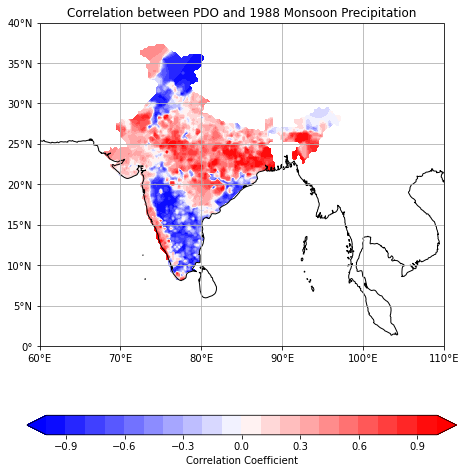

In [50]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

data=maxmon_rmap
data,lon=add_cyclic_point(maxmon_rmap,coord=ds_1988_2['lon'])


cs=ax.contourf(lon,ds_1988_2['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')


ax.coastlines()


ax.gridlines()

 
ax.set_xticks(np.arange(60,111,10),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)


ax.set_yticks(np.arange(0,41,5),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')


plt.title('Correlation between PDO and 1988 Monsoon Precipitation')

## Summary

In this data analysis I studied India's precipitation climatology, monsoon precipitation, and the relationship between India's precipitation and the Pacific Decadal Oscillation.

I discovered that India is a generally dry region that receives most of its precipitation during the monsoon season. According to the precipitation data, India experienced a a very wet monsoon during the year of 1988 and a very dry monsoon during the year of 1911. 

My analysis pointed to a relationship between Indian precipitation and the Pacific Decadal Oscillation. Warm PDO phases tended to bring overall drier conditions to the country and cool PDO phases tended to bring overall wetter conditions to the country, although there was much variability depending on regions within the country. 

Composite differences in both the Warm PDO-Neutral PDO and Cool PDO-Neutral PDO showed significance in Northern India.

Correlation between PDO and Indian precipitation anomalies seemed to be quite weak with small positive correlation values in Northern and Eastern India.

Correlation between PDO and the 1988 Indian monsoon seemed to be highly correlated in Eastern India in addition to along the Western Coast. These are areas in which the highest precipition values were observed during the 1988 monsoon. Although this seems to be a telling result, it must be remembered that correlation does not equal causation. PDO was in a warm phase during 1988 which, if one recalls, is theorized to bring drier conditions, not wetter. 

Further examination using the given data would be needed in order to correctly theorize the relationship between the Pacific Decadal Oscillation and the Indian monsoon.